# Linear Regression

## Load in Libraries

You'll need numpy (`import numpy as np`) in addition to any others you think are relevant.

In [ ]:
# Basic working with data libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Library including linear/logistic regression
import statsmodels.api as sm

## Exercise 1. Wine Quality

The [dataset is at this link](https://raw.githubusercontent.com/Greg-Hallenbeck/class-datasets/main/datasets/winequality.csv), and origininally was posted on the [UCI machine learning repository](https://archive.ics.uci.edu/dataset/186/wine+quality).

Try and predict the wine quality using any other relevant variables.


In [ ]:
wine = pd.read_csv("https://raw.githubusercontent.com/Greg-Hallenbeck/class-datasets/main/datasets/winequality.csv")
wine

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,white
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,white
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,white
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red


Fit a line model. Interpret the intercept and at least two of the slopes.

In [ ]:


X = wine.copy()


In [ ]:
X = pd.get_dummies(X, drop_first=True).astype("float32")

X = (X-X.mean())/X.std() #Normalization or Standardization

y = X.pop("quality")

In [ ]:
X = sm.tools.tools.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     227.8
Date:                Mon, 21 Oct 2024   Prob (F-statistic):               0.00
Time:                        14:24:10   Log-Likelihood:                -8075.7
No. Observations:                6497   AIC:                         1.618e+04
Df Residuals:                    6484   BIC:                         1.627e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.309e-06 

In [ ]:
#Citric Acid is not statistically significant, meaning we cannot "rule out" that the relationship between it and quality is due to random chance

#P Value says, if this were completely due to randomness, what is the percent chance of this happening (a 0.5) p value says theres a 50% chance of this happening due to chance

#In terms of slope, for every 1 increase in free sulfur dioxide, the quality should increse by 0.1003

#Since color white is a 0 or 1 value (red or white), white wine being white decreases the quality by -0.1782


#Density has the largest effect on our coefficienct, followed closely by Residual Sugar

The intercept is our constant +/- standard error, which is 75.8868 +/- 9.318

One slope to look at is -113.3615 for density, which says that if you increase the density by 1, the quality of wine decreases by 113, so this probably needs to be looked at on a smaller scale since the density changes only vary slightly throughout the dataset



Evaluate the model. Whenever I ask for this, you should *always*:
1. Look for trends in the errors.
1. Determine the size of a typical error, and compare it with the original range of $y$.

In [ ]:
yhat = model.predict()
residuals = y - yhat

In [ ]:
np.std(residuals)

0.7323676083468249

In [ ]:
np.std(y)

0.9999425411224365

Text(0, 0.5, 'Residual')

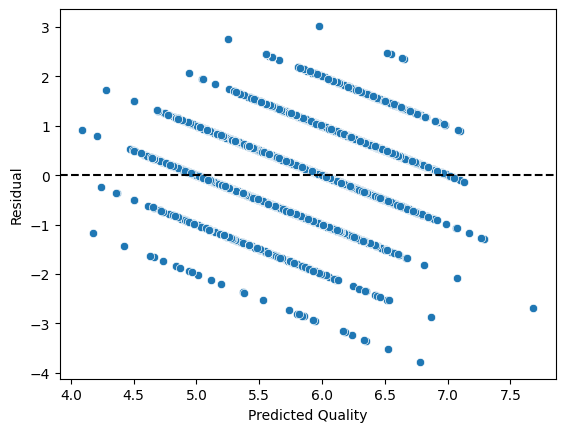

In [ ]:
ax = sns.scatterplot(x=yhat, y=residuals)
ax.axhline(y=0, color='black', linestyle='dashed')

plt.xlabel("Predicted Quality")
plt.ylabel("Residual")

## Exercise 2. Life Expectancy Data

You can get the dataset [at this URL](https://raw.githubusercontent.com/Greg-Hallenbeck/HARP-325-DataSociety/main/dataset/Life%20Expectancy%20Data.csv), and the data was on [this page on kaggle](https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who), but presumably originally from [the WHO website](https://www.who.int/).

Let's see if we can predict life expectancy from GDP per capita. One would expect that having money would help people live longer, but the relationship doesn't continue infinitely: billionaires don't live 1000x as long as millionaires, and so on.

Load in the dataset.

In [ ]:
life = pd.read_csv("https://raw.githubusercontent.com/Greg-Hallenbeck/HARP-325-DataSociety/main/dataset/Life%20Expectancy%20Data.csv")
life.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [ ]:
life.dtypes

,0
Country,object
Year,int64
Status,object
Life expectancy,float64
Adult Mortality,float64
infant deaths,int64
Alcohol,float64
percentage expenditure,float64
Hepatitis B,float64
Measles,int64


Plot life expectancy and GDP. Is there a linear relationship?

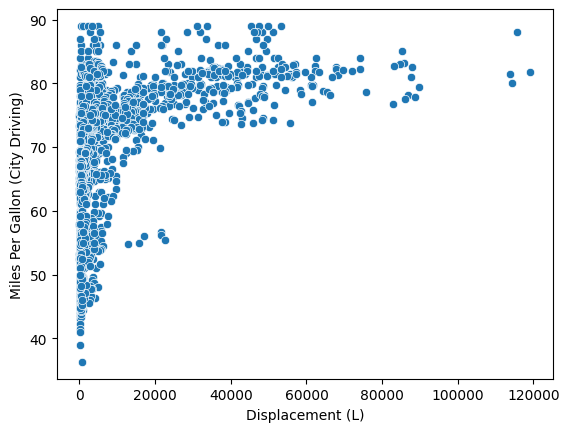

In [ ]:
sns.scatterplot(life, x="GDP", y="Life expectancy ")

plt.xlabel("GDP")
plt.ylabel("Life Expectancy")

plt.show()

No, this can't be explained using a line to depict the trend, so its nonlinear

Add a transformation: create a new column called `logGDP` which is the logarithm of GDP per capita, i.e. `np.log10(who.GDP)`. This

Plot them again. Is there a vaguely linear relationship now?

In [ ]:
life["logGDP"] = np.log10(life.GDP)


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,logGDP
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,2.766606
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,2.787245
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,2.800542
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,2.826048
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,1.803028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,2.657406
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,2.656435
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,1.758521
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,2.739246


In [ ]:


X = life.copy()
X = X.dropna()
X = X.drop("Country",axis = 1) #Country is a HUUUGE FACTOR THO
X = X.drop("under-five deaths ", axis = 1) #we have 2 of these very similar variables (infant deaths and under 5)
#X = X.drop("Year", axis = 1)

In [ ]:
X = pd.get_dummies(X, drop_first=True).astype("float32")

X = (X-X.mean())/X.std() #Normalization or Standardization

y = X.pop("Life expectancy ")

In [ ]:
X = sm.tools.tools.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Life expectancy    R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     407.8
Date:                Wed, 23 Oct 2024   Prob (F-statistic):               0.00
Time:                        14:33:54   Log-Likelihood:                -4446.2
No. Observations:                1649   AIC:                             8934.
Df Residuals:                    1628   BIC:                             9048.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

Evaluate the Model

In [ ]:
yhat = model.predict()
residuals = y - yhat

Text(0, 0.5, 'Residual')

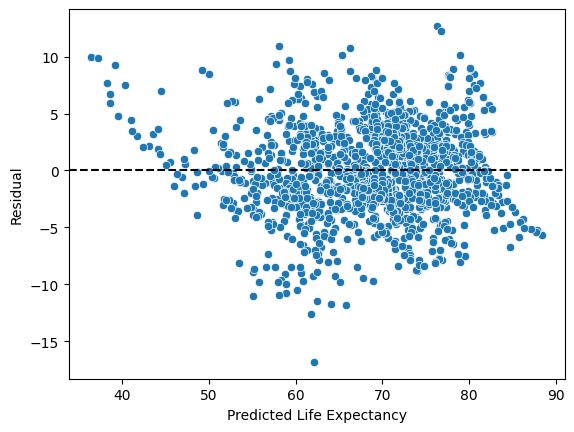

In [ ]:
ax = sns.scatterplot(x=yhat, y=residuals)
ax.axhline(y=0, color='black', linestyle='dashed')

plt.xlabel("Predicted Life Expectancy")
plt.ylabel("Residual")

In [ ]:
#Anything with less than 0.05 P value is statistically significant

#The variables with the largest effect are those that are statistically significant, HIV/AIDS has a higher correlation than most the other variables

#To see what changing a variable would do, we have to unstandardize the result, so lets say we want to add 6 more years of schooling...

In [ ]:

X = life.copy()
X = X.dropna()
X = X.drop("Country",axis = 1) #Country is a HUUUGE FACTOR THO

In [ ]:
X = pd.get_dummies(X, drop_first=True).astype("float32")

#X = (X-X.mean())/X.std() #No longer standardizing

y = X.pop("Life expectancy ")

In [ ]:
X = sm.tools.tools.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Life expectancy    R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     409.9
Date:                Wed, 23 Oct 2024   Prob (F-statistic):               0.00
Time:                        14:24:40   Log-Likelihood:                -4408.6
No. Observations:                1649   AIC:                             8861.
Df Residuals:                    1627   BIC:                             8980.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [ ]:
#Now we multiply schooling by 6, and get 5 more years life expectancy for 6 years more schooling

6*0.8381

5.0286

In [ ]:
yhat = model.predict()
residuals = y - yhat

Text(0, 0.5, 'Residual')

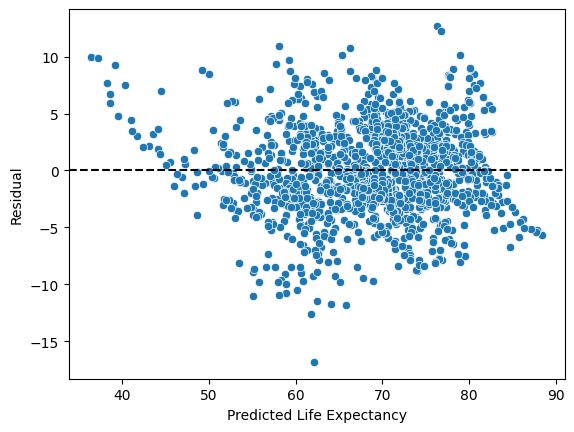

In [ ]:
ax = sns.scatterplot(x=yhat, y=residuals)
ax.axhline(y=0, color='black', linestyle='dashed')

plt.xlabel("Predicted Life Expectancy")
plt.ylabel("Residual")

In [ ]:
print(residuals.std())
print(y.std())

3.588189851378494
8.796832084655762


What are things we should be targetting to increase life expectancy?

For these targets we want
A)Statistical significance
B)Strong STANDARDIZED effect
C)Things that can be changed (EX: we can't change peoples age or country, but we can use it to identify what we do for those people)

Looking at the standardized coefficients (first summary)

# Multilinear Regression Exercises

Repeat Exercise 2 above, but instead of using just logGDP, use any columns that you think is worth including. Has including multiple columns improved the model? How?